In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report


In [2]:
data = pd.read_csv('20191226-reviews.csv')

# Preprocessing: Remove duplicates and handle missing values
data.drop_duplicates(inplace=True)
data.dropna(subset=['rating', 'verified'], inplace=True)

# Convert ratings to binary labels
data['body'] = data['verified'].apply(
    lambda rating: 1 if rating >= 4 else 0)


In [ ]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, 



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [3]:
pip install nltk


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 1.0 MB/s eta 0:00:0000:0100:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.1/78.1 kB 1.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 1.3 MB/s eta 0:00:00a 0:00:01
--- Logging error ---
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1673, in print
    extend(render(renderable, render_options))
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1305, in render
    for render_output in iter_render:
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_i

In [4]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Error loading vader_lexicon: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:997)>


False

In [10]:
import nltk
print(nltk.data.path)


['/Users/aryanlodha/nltk_data', '/Library/Frameworks/Python.framework/Versions/3.10/nltk_data', '/Library/Frameworks/Python.framework/Versions/3.10/share/nltk_data', '/Library/Frameworks/Python.framework/Versions/3.10/lib/nltk_data', '/usr/share/nltk_data', '/usr/local/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/lib/nltk_data', '/path/to/nltk_data', '/path/to/nltk_data']


In [11]:
import os
os.environ["NLTK_DATA"] = "/path/to/nltk_data"


In [13]:
data = pd.read_csv(
    "20191226-reviews.csv")
print(data.head())


         asin           name  rating               date  verified  \
0  B0000SX2UC          Janet       3   October 11, 2005     False   
1  B0000SX2UC     Luke Wyatt       1    January 7, 2004     False   
2  B0000SX2UC         Brooke       5  December 30, 2003     False   
3  B0000SX2UC  amy m. teague       3     March 18, 2004     False   
4  B0000SX2UC  tristazbimmer       4    August 28, 2005     False   

                                          title  \
0                   Def not best, but not worst   
1                   Text Messaging Doesn't Work   
2                               Love This Phone   
3                       Love the Phone, BUT...!   
4  Great phone service and options, lousy case!   

                                                body  helpfulVotes  
0  I had the Samsung A600 for awhile which is abs...           1.0  
1  Due to a software issue between Nokia and Spri...          17.0  
2  This is a great, reliable phone. I also purcha...           5.0  
3 

In [14]:
print(data.describe())


             rating  helpfulVotes
count  67986.000000  27215.000000
mean       3.807916      8.229690
std        1.582906     31.954877
min        1.000000      1.000000
25%        3.000000      1.000000
50%        5.000000      2.000000
75%        5.000000      5.000000
max        5.000000    990.000000


In [15]:
data = data.dropna()
data


,asin,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0
...,...,...,...,...,...,...,...,...
67978,B081H6STQQ,Rock Edge,5,"July 16, 2019",False,Candy bar phone is back!,Update 8/14/19 5 stars now! I've been using th...,12.0
67979,B081H6STQQ,Cindy Cowles,3,"July 17, 2019",False,Updated review,Update: If you like sending and receiving pict...,2.0
67980,B081H6STQQ,Los Kositos,5,"October 7, 2019",False,From iPhone to Android and loving it,I love my new phone. I've been dying to do a r...,1.0
67981,B081H6STQQ,jande,5,"August 16, 2019",False,"Awesome Phone, but finger scanner is a big mis...",I love the camera on this phone. The screen is...,1.0


In [16]:
ratings = data["rating"].value_counts()
numbers = ratings.index
quantity = ratings.values


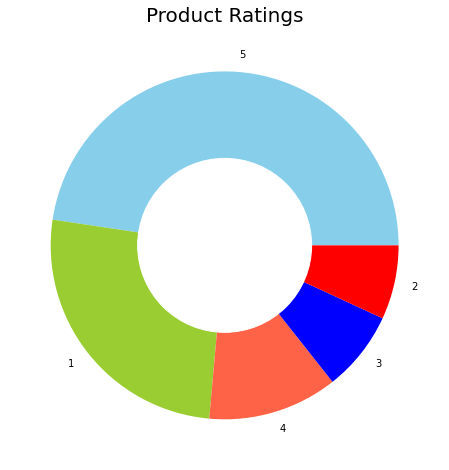

In [17]:
custom_colors = ["skyblue", "yellowgreen", 'tomato', "blue", "red"]
plt.figure(figsize=(10, 8))
plt.pie(quantity, labels=numbers, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Product Ratings", fontsize=20)
plt.show()


In [22]:
import nltk
print(nltk.data.path)


['/Users/aryanlodha/nltk_data', '/Library/Frameworks/Python.framework/Versions/3.10/nltk_data', '/Library/Frameworks/Python.framework/Versions/3.10/share/nltk_data', '/Library/Frameworks/Python.framework/Versions/3.10/lib/nltk_data', '/usr/share/nltk_data', '/usr/local/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/lib/nltk_data', '/path/to/nltk_data', '/path/to/nltk_data']


In [33]:
pip install textblob


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 447.0 kB/s eta 0:00:0000:0100:01
--- Logging error ---
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1673, in print
    extend(render(renderable, render_options))
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1305, in render
    for render_output in iter_render:
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendo

In [35]:
from textblob import TextBlob
import pandas as pd

# Load the dataset
data = pd.read_csv('20191226-reviews.csv')

# Preprocessing: Remove duplicates and handle missing values
data.drop_duplicates(inplace=True)
data.dropna(subset=['body', 'rating'], inplace=True)

# Convert ratings to binary labels
data['sentiment'] = data['rating'].apply(
    lambda rating: 'positive' if rating >= 4 else 'negative')

# Perform sentiment analysis using TextBlob
data['polarity'] = data['body'].apply(
    lambda text: TextBlob(text).sentiment.polarity)

# Categorize polarity as positive, negative, or neutral
data['polarity_category'] = data['polarity'].apply(
    lambda polarity: 'positive' if polarity > 0 else 'negative' if polarity < 0 else 'neutral')

# Print the first few rows of the result
print(data.head())


         asin           name  rating               date  verified  \
0  B0000SX2UC          Janet       3   October 11, 2005     False   
1  B0000SX2UC     Luke Wyatt       1    January 7, 2004     False   
2  B0000SX2UC         Brooke       5  December 30, 2003     False   
3  B0000SX2UC  amy m. teague       3     March 18, 2004     False   
4  B0000SX2UC  tristazbimmer       4    August 28, 2005     False   

                                          title  \
0                   Def not best, but not worst   
1                   Text Messaging Doesn't Work   
2                               Love This Phone   
3                       Love the Phone, BUT...!   
4  Great phone service and options, lousy case!   

                                                body  helpfulVotes sentiment  \
0  I had the Samsung A600 for awhile which is abs...           1.0  negative   
1  Due to a software issue between Nokia and Spri...          17.0  negative   
2  This is a great, reliable phone. I 

In [39]:
import pandas as pd
from textblob import TextBlob

# Load the dataset
data = pd.read_csv('20191226-reviews.csv')

# Preprocessing: Remove duplicates and handle missing values
data.drop_duplicates(inplace=True)
data.dropna(subset=['body', 'rating'], inplace=True)

# Convert ratings to binary labels (positive or negative)
data['sentiment'] = data['rating'].apply(
    lambda rating: 'positive' if rating >= 4 else 'negative')

# Perform sentiment analysis using TextBlob
data['polarity'] = data['body'].apply(
    lambda text: TextBlob(text).sentiment.polarity)

# Categorize polarity as positive, negative, or neutral


def categorize_polarity(polarity):
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'


data['polarity_category'] = data['polarity'].apply(categorize_polarity)

# Print the first few rows of the result
print(data.head())


         asin           name  rating               date  verified  \
0  B0000SX2UC          Janet       3   October 11, 2005     False   
1  B0000SX2UC     Luke Wyatt       1    January 7, 2004     False   
2  B0000SX2UC         Brooke       5  December 30, 2003     False   
3  B0000SX2UC  amy m. teague       3     March 18, 2004     False   
4  B0000SX2UC  tristazbimmer       4    August 28, 2005     False   

                                          title  \
0                   Def not best, but not worst   
1                   Text Messaging Doesn't Work   
2                               Love This Phone   
3                       Love the Phone, BUT...!   
4  Great phone service and options, lousy case!   

                                                body  helpfulVotes sentiment  \
0  I had the Samsung A600 for awhile which is abs...           1.0  negative   
1  Due to a software issue between Nokia and Spri...          17.0  negative   
2  This is a great, reliable phone. I 